# EDA - Vacunación
## 0. Previos

Se cargan las bases y las librerías a utilizar.

In [1]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Base de interés
base = pd.read_excel('C:/Users/monic/documentos/ds4a/project/datos/Vacunacion.xlsx')
base.head()

,Numero_de_documento,Fecha_Emision,Regional_EPS_Desc,Codigo_Prestacion_Op,Descripcion_Prestacion,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,Cantidad_Autorizada
0,845676,2018-01-29,Bogota,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z251,NECESIDAD DE INMUNIZACIÓN CONTRA LA INFLUENZA ...,1
1,686768,2018-05-20,Medellin,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
2,1790062,2018-06-05,Medellin,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z251,NECESIDAD DE INMUNIZACIÓN CONTRA LA INFLUENZA ...,1
3,1142931,2018-01-10,Medellin,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
4,1734917,2018-06-06,Medellin,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z251,NECESIDAD DE INMUNIZACIÓN CONTRA LA INFLUENZA ...,1


In [3]:
# Base de ids
ids = pd.read_excel('C:/Users/monic/documentos/ds4a/project/datos/Datos basicos.xlsx')
ids.head()

,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
0,500547,58.0,M,SECUNDARIA,CASADO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1962-05-19 00:00:00
1,500588,15.0,M,PRIMARIA,SOLTERO (A),NaN,CUNDINAMARCA,BOGOTA,2.0,URBANA,MADRE,B,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2004-12-19 00:00:00
2,502989,29.0,M,UNIVERSITARIO,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,1990-08-22 00:00:00
3,506808,11.0,M,EDAD PREESCOLAR,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,BELLO,1.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2008-10-06 00:00:00
4,512938,22.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1997-10-15 00:00:00


## 1. Tipos

In [4]:
base.describe()

,Numero_de_documento,Cantidad_Autorizada
count,2.640000e+02,264.0
mean,1.222966e+06,1.0
std,4.297377e+05,0.0
min,5.005470e+05,1.0
25%,8.442592e+05,1.0
50%,1.216245e+06,1.0
75%,1.640782e+06,1.0
max,1.985014e+06,1.0


In [5]:
base.dtypes

Numero_de_documento                   int64
Fecha_Emision                datetime64[ns]
Regional_EPS_Desc                    object
Codigo_Prestacion_Op                 object
Descripcion_Prestacion               object
Codigo_Diagnostico_EPS_Op            object
Diagnostico_EPS_Desc                 object
Cantidad_Autorizada                   int64
dtype: object

Los tipos son consistentes con lo esperado: 

* Identificación es de tipo numérico
* Fecha_Emision es fecha
* Cantidad es numérico
* Las demás son texto son texto

## 2. Aporte Conceptual

Se espera entender la asistencia a alguna vacuna y verificar si hay relación entre las vacunas y la adeherencia.

## 3. Calidad
### 3.6 Cruce con la tabla de identificaciones

In [8]:
# Identificaciones únicas en la tabla de pacientes: 872
ids_unicos = ids.groupby(['ID'])['edad'].count().reset_index()
ids_unicos.describe()

,ID,edad
count,8.720000e+02,872.000000
mean,1.259526e+06,1.017202
std,4.343817e+05,0.138642
min,5.005470e+05,1.000000
25%,8.887368e+05,1.000000
50%,1.258122e+06,1.000000
75%,1.647997e+06,1.000000
max,1.999629e+06,3.000000


In [9]:
# Identificaciones únias en la tabla de Calidad: 146
id_c = 'Numero_de_documento'
var_x = 'Fecha_Emision'
ids_base = base.groupby([ id_c ])[ var_x ].count().reset_index(name = 'cuenta')
ids_base.describe()

,Numero_de_documento,cuenta
count,1.610000e+02,161.000000
mean,1.218879e+06,1.639752
std,4.286949e+05,0.862792
min,5.005470e+05,1.000000
25%,8.505090e+05,1.000000
50%,1.216245e+06,1.000000
75%,1.636467e+06,2.000000
max,1.985014e+06,6.000000


In [11]:
# Cruce de las dos tablas
cruce = ids_base.merge(ids_unicos, how = 'inner', left_on = id_c, right_on ='ID')
cruce.describe()

,Numero_de_documento,cuenta,ID,edad
count,1.610000e+02,161.000000,1.610000e+02,161.000000
mean,1.218879e+06,1.639752,1.218879e+06,1.012422
std,4.286949e+05,0.862792,4.286949e+05,0.111107
min,5.005470e+05,1.000000,5.005470e+05,1.000000
25%,8.505090e+05,1.000000,8.505090e+05,1.000000
50%,1.216245e+06,1.000000,1.216245e+06,1.000000
75%,1.636467e+06,2.000000,1.636467e+06,1.000000
max,1.985014e+06,6.000000,1.985014e+06,2.000000


Se encuentra que todos los pacientes de la tabla de calidad están en la tabla de datos demográficos. 

## 4. Exploración
### 4.1 Distribuciones
### Fecha_Emision

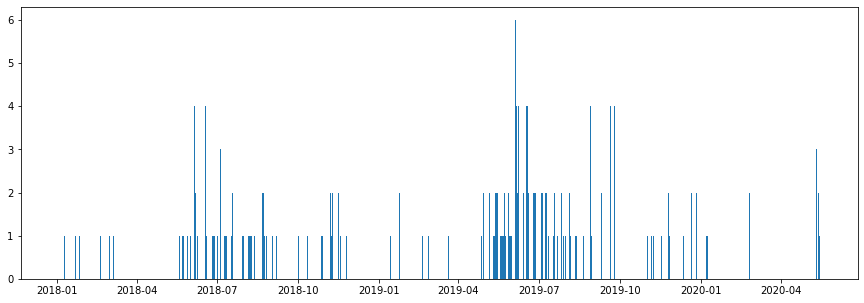

In [13]:
# plot
base_gf = base.groupby('Fecha_Emision').count().reset_index()

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(base_gf['Fecha_Emision'], base_gf[ id_c ] )

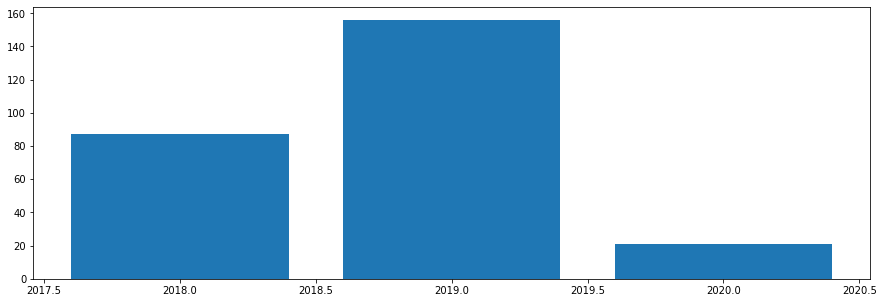

In [16]:
base_gf['year'] = base_gf['Fecha_Emision'].apply( lambda x: x.year )
base_gf['year'] = base_gf['year'].astype( int )
base_gf_gy = base_gf.groupby('year')[ id_c ].sum().reset_index()

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(base_gf_gy['year'], base_gf_gy[ id_c ] )

Se encuentra que la mayoría de los registros están desde 2017, no tienen una distribución uniforme desde ese momento.

### Regional_EPS_Desc

In [17]:
base.columns

Index(['Numero_de_documento', 'Fecha_Emision', 'Regional_EPS_Desc',
       'Codigo_Prestacion_Op', 'Descripcion_Prestacion',
       'Codigo_Diagnostico_EPS_Op', 'Diagnostico_EPS_Desc',
       'Cantidad_Autorizada'],
      dtype='object')

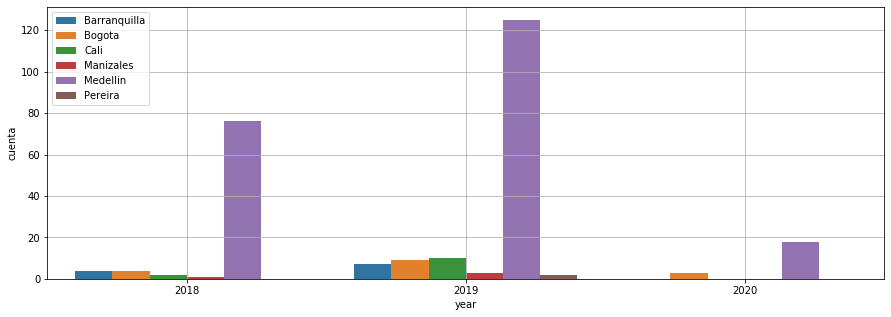

In [19]:
base['year'] = base['Fecha_Emision'].apply( lambda x: x.year )
base['year'] = base['year'].astype( int )

base_gdy = base.groupby(['Regional_EPS_Desc', 'year'])[ id_c ].count().reset_index( name = 'cuenta')
base_gdy_pivot = base_gdy.pivot('Regional_EPS_Desc', 'year', 'cuenta')


fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='year', y='cuenta', hue='Regional_EPS_Desc', data=base_gdy)

plt.legend(loc="upper left")
plt.grid(True)

La mayor proporción de las encuestas son en Medellín, puede ser buena idea centrar los análisis para esa ciudad.

### Codigo_Prestacion_Op y Descripcion_Prestacion

In [20]:
bgp = base.groupby(['Codigo_Prestacion_Op','Descripcion_Prestacion'])[ id_c ].count().reset_index(name = 'cuenta')
bgp.groupby('Codigo_Prestacion_Op')['cuenta'].count().reset_index(name='cuenta').sort_values('cuenta', ascending = False)

,Codigo_Prestacion_Op,cuenta
0,M024860,1
1,S0906218,1
2,S0906219,1
3,S0906223,1
4,S1120182,1
5,S1120191,1
6,S1120192,1
7,S1120193,1
8,S1120194,1
9,S1120195,1


No hay distintas descripciones para el mismo código.

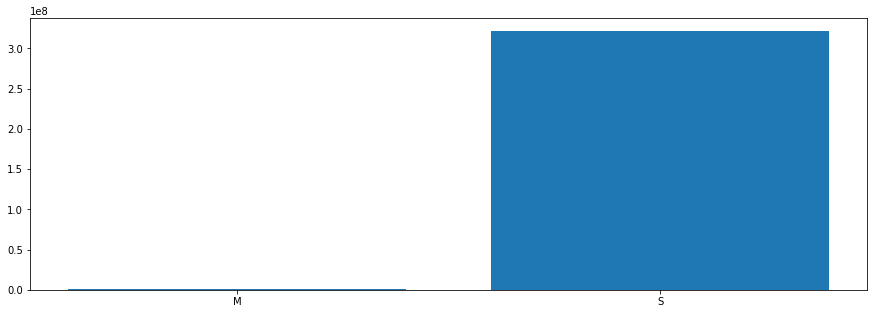

In [21]:
base['cod_prestacion'] = base['Codigo_Prestacion_Op'].apply( lambda x : x[0] )
base_gf_gy = base.groupby('cod_prestacion')[ id_c ].sum().reset_index()

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(base_gf_gy['cod_prestacion'], base_gf_gy[ id_c ] )

En este caso todos la mayoría de las Prestaciones comienzan con `S` hay algunas pocas que comienzan con `M`.

In [22]:
base[ base['cod_prestacion'] == 'M' ]

,Numero_de_documento,Fecha_Emision,Regional_EPS_Desc,Codigo_Prestacion_Op,Descripcion_Prestacion,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,Cantidad_Autorizada,year,cod_prestacion
95,1216245,2019-03-21,Barranquilla,M024860,VACUNA HEPATITIS B ADULTOS -INDICACIONES DIFER...,M45X,ESPONDILITIS ANQUILOSANTE,1,2019,M


### Codigo_Diagnostico_EPS_Op y Diagnostico_EPS_Desc

In [23]:
bgp = base.groupby(['Codigo_Diagnostico_EPS_Op','Diagnostico_EPS_Desc'])[ id_c ].count().reset_index(name = 'cuenta')
bgp.groupby('Codigo_Diagnostico_EPS_Op')['cuenta'].count().reset_index(name='cuenta').sort_values('cuenta', ascending = False)

,Codigo_Diagnostico_EPS_Op,cuenta
0,J13X,1
1,J459,1
2,K746,1
3,K760,1
4,L508,1
5,M069,1
6,M45X,1
7,M769,1
8,M797,1
9,R160,1


Para cada código tenemos una única descripción.

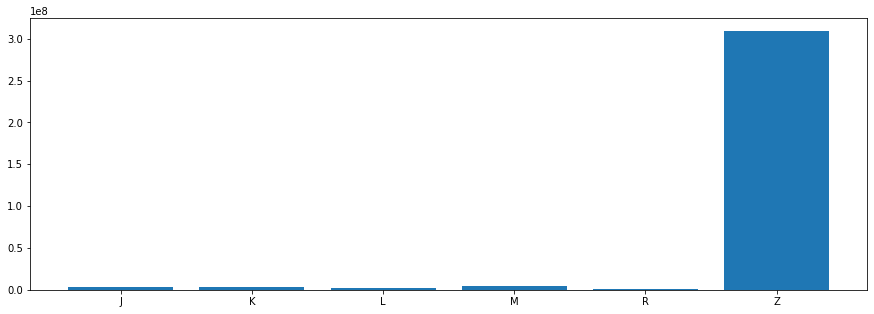

In [24]:
base['cod_diagnostico'] = base['Codigo_Diagnostico_EPS_Op'].apply( lambda x : str(x)[0] )
base_gf_gy = base.groupby('cod_diagnostico')[ id_c ].sum().reset_index( name = 'cuenta')

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(base_gf_gy['cod_diagnostico'], base_gf_gy[ 'cuenta' ] )

Se encuentra que la mayoría de las enferemedades están relacionadas con `Z`:

In [25]:
base[ base['cod_diagnostico'] == 'Z' ].head()

,Numero_de_documento,Fecha_Emision,Regional_EPS_Desc,Codigo_Prestacion_Op,Descripcion_Prestacion,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,Cantidad_Autorizada,year,cod_prestacion,cod_diagnostico
0,845676,2018-01-29,Bogota,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z251,NECESIDAD DE INMUNIZACIÓN CONTRA LA INFLUENZA ...,1,2018,S,Z
1,686768,2018-05-20,Medellin,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1,2018,S,Z
2,1790062,2018-06-05,Medellin,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z251,NECESIDAD DE INMUNIZACIÓN CONTRA LA INFLUENZA ...,1,2018,S,Z
3,1142931,2018-01-10,Medellin,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1,2018,S,Z
4,1734917,2018-06-06,Medellin,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z251,NECESIDAD DE INMUNIZACIÓN CONTRA LA INFLUENZA ...,1,2018,S,Z


### Cantidad_Autorizada

In [27]:
base.describe()

,Numero_de_documento,Cantidad_Autorizada,year
count,2.640000e+02,264.0,264.000000
mean,1.222966e+06,1.0,2018.750000
std,4.297377e+05,0.0,0.589838
min,5.005470e+05,1.0,2018.000000
25%,8.442592e+05,1.0,2018.000000
50%,1.216245e+06,1.0,2019.000000
75%,1.640782e+06,1.0,2019.000000
max,1.985014e+06,1.0,2020.000000


Se encuentran valores positivos para la variable `Cantidad_Autorizada`. Normalmente se autoriza sólo una dosis.

## 5. Definiciones Modelo de Datos
### 5.1 Transformación y Limpieza

* Esta tabla debería consolidarse a nivel ID, Fecha. Esto implica una definición de variables explicativas ya que un paciente puede aparecer más de una vez por mes.

* Si el cruce se hace por fecha (i.e. YYYYMM) es necesario realizar esta transformación en la variable `Fecha_Emision`

In [33]:
base['month'] = base['Fecha_Emision'].apply( lambda x: x.month )
base.groupby([ id_c, 'year', 'month'])['Fecha_Emision'].count().reset_index(name='cuenta').\
      sort_values('cuenta', ascending = False).head(10)

,Numero_de_documento,year,month,cuenta
50,840009,2019,6,4
208,1932263,2020,5,3
107,1227104,2019,7,2
56,880573,2019,7,2
34,695889,2020,5,2
189,1773709,2019,2,2
38,747179,2019,6,2
39,750155,2019,6,2
96,1180678,2019,9,2
41,752567,2019,9,2


In [36]:
base[ (base[id_c] == 840009) & (base['year'] == 2019) & (base['month'] == 6) ].\
    sort_values(['Codigo_Diagnostico_EPS_Op','Fecha_Emision']).head(10)

,Numero_de_documento,Fecha_Emision,Regional_EPS_Desc,Codigo_Prestacion_Op,Descripcion_Prestacion,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,Cantidad_Autorizada,year,cod_prestacion,cod_diagnostico,month
153,840009,2019-06-08,Bogota,S9931001,VACUNA NEUMOCOCO 23 -USO EXCLUSIVO BOGOTA Y CA...,J13X,NEUMONÍA DEBIDA A STREPTOCOCCUS PNEUMONIAE,1,2019,S,J,6
213,840009,2019-06-08,Bogota,S9931001,VACUNA NEUMOCOCO 23 -USO EXCLUSIVO BOGOTA Y CA...,J13X,NEUMONÍA DEBIDA A STREPTOCOCCUS PNEUMONIAE,1,2019,S,J,6
152,840009,2019-06-08,Bogota,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z251,NECESIDAD DE INMUNIZACIÓN CONTRA LA INFLUENZA ...,1,2019,S,Z,6
223,840009,2019-06-08,Bogota,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z251,NECESIDAD DE INMUNIZACIÓN CONTRA LA INFLUENZA ...,1,2019,S,Z,6


### 5.2 Modelo de Datos

El cruce debe hacerce por `Numero_de_documento` y `Fecha_Emision`. Habiendo realizado una consolidación de la información.

### 5.3 Definición de Variables

* Número de vacunas aplicadas (histórico)
* Número de vacunas aplicadas (último año)
* ¿Se ha vacunado antes? (sí/no)